In [2]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd
from scipy import stats
import seaborn as sn

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Drops specific values in a dataframe
# if flag = 1, drops values less than 'val'
# if flag = 0, drops values greater than 'val'
def drop_values(dataframe, column, val, flag):
    if flag:
        return dataframe.drop(dataframe[column < val].index)
    else:
        return dataframe.drop(dataframe[column > val].index)
    
# Normalize the data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
    
# MAKE THE CLUSTER DATAFRAME
dataframe = pd.read_pickle('CLUSTER_DATASET.pkl')
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 16:00:00,21.898333,19.096778,1.161667,1.975000,2.187778,52.662000,1.424325,135.239611,1.422013,99140.480000,1.490,3.941,5.639,40.473,15.705,11.404,4.303,12.375,27.602
2020-05-06 17:00:00,21.836278,18.678667,1.469444,2.380556,2.604444,53.213833,1.424310,118.911944,1.422118,99111.335556,1.910,5.132,6.875,40.592,19.672,15.035,4.628,12.848,26.503
2020-05-06 18:00:00,18.713167,20.979889,1.914444,2.970556,3.246667,53.447722,1.424056,98.456389,1.422115,99124.504444,2.493,7.458,9.555,39.162,21.342,16.181,5.170,12.150,27.662
2020-05-06 19:00:00,15.544500,24.716389,2.207222,3.381667,3.666111,53.151778,1.423809,91.426611,1.422016,99156.430556,1.458,10.777,12.126,35.057,16.456,11.442,5.010,11.400,28.912
2020-05-06 20:00:00,14.085389,23.612889,1.320000,1.861111,1.991111,49.789500,1.423761,74.300333,1.422064,99214.601111,0.397,3.695,4.078,38.341,13.062,9.670,3.400,10.556,26.898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-11 08:00:00,22.536722,47.906389,0.006667,0.012778,0.035556,33.327778,1.424768,113.768333,1.422166,98993.835000,1.155,2.578,3.717,12.515,9.557,8.350,1.206,17.117,60.513
2020-06-11 09:00:00,27.375333,36.148278,0.310000,0.345556,0.371111,41.197000,1.425056,80.151056,1.422676,99148.971667,1.176,2.672,3.848,21.919,9.565,8.244,1.322,18.267,50.782
2020-06-11 10:00:00,29.620167,32.527056,0.034444,0.055000,0.083889,52.062222,1.425067,83.708444,1.422796,99232.233333,1.290,2.521,3.767,22.186,8.287,6.954,1.334,19.047,50.624


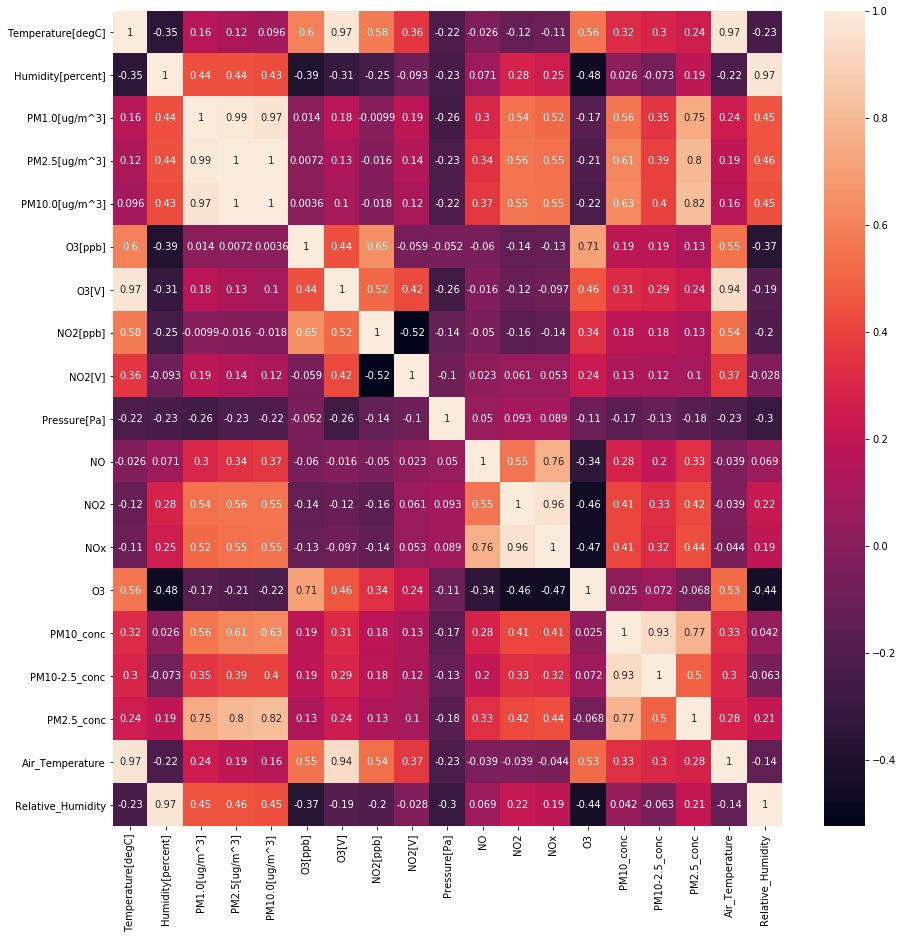

In [4]:
corrMatrix = dataframe.corr()
plt.subplots(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

0.945070107247789

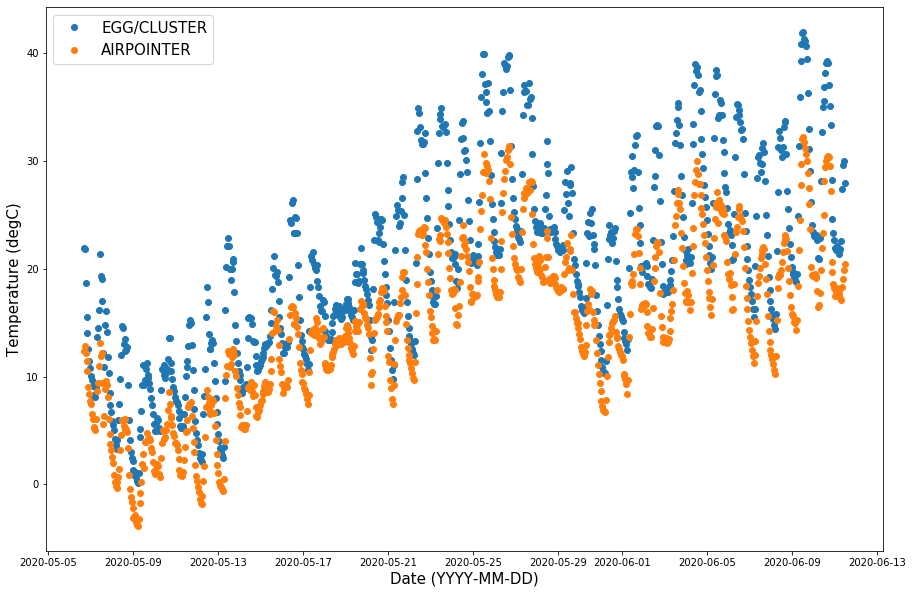

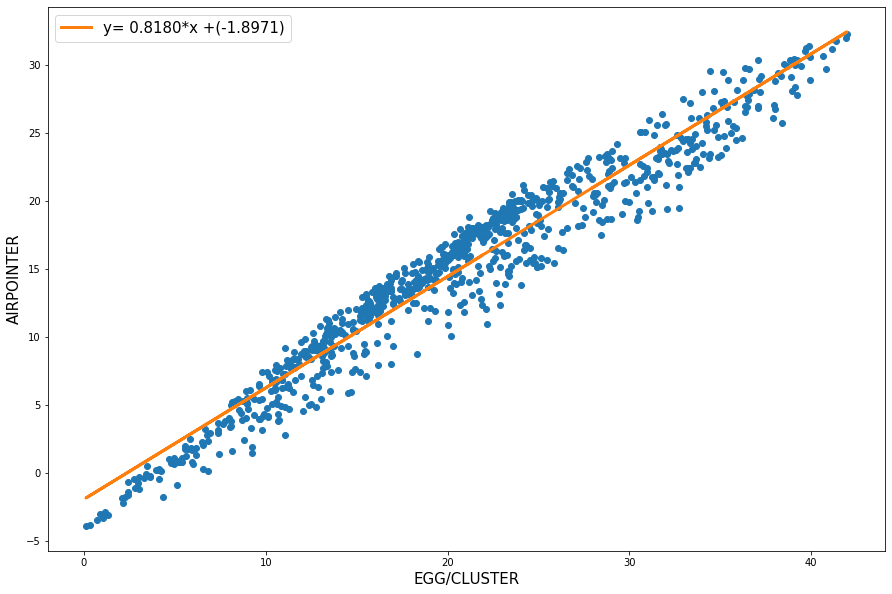

In [4]:
# ----------------------------- TEMPERATURE FROM CLUSTER vs. AIR_TEMPERATURE FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Temperature[degC]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['Air_Temperature'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('Temperature (degC)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['Temperature[degC]'].to_numpy()
# Airpointer
yValues = dataframe['Air_Temperature'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.9481468446209877

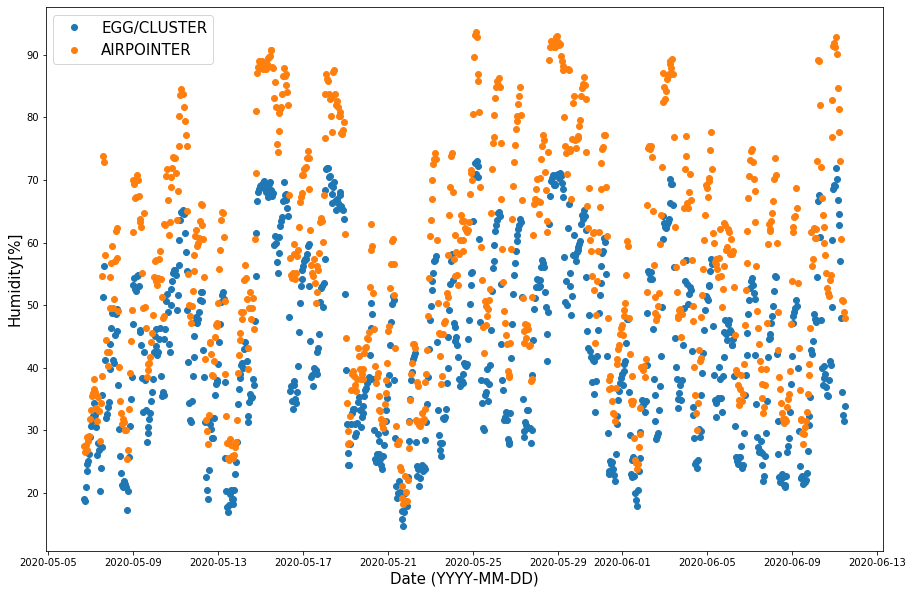

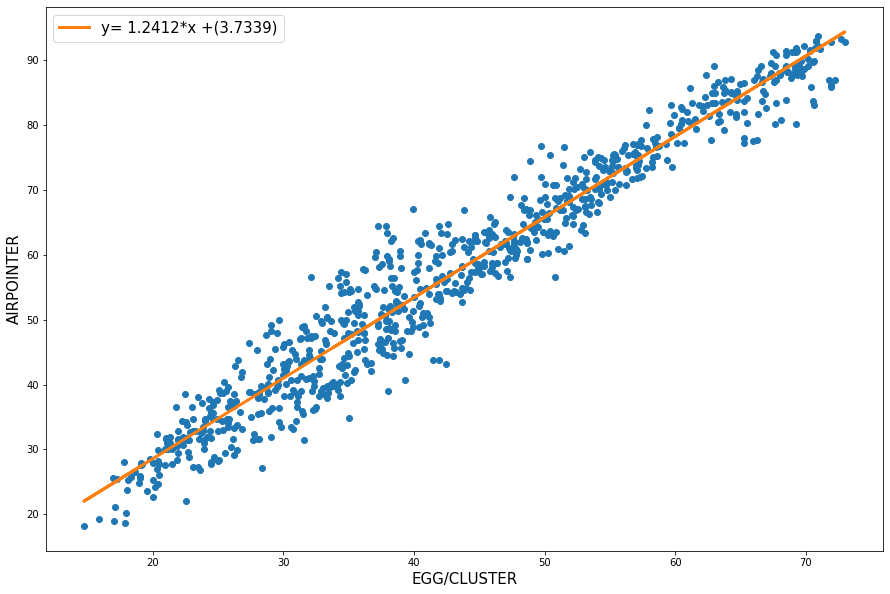

In [6]:
# ----------------------------- HUMIDITY FROM CLUSTER vs. HUMIDITY FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Humidity[percent]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['Relative_Humidity'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('Humidity[%]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['Humidity[percent]'].to_numpy()
# Airpointer
yValues = dataframe['Relative_Humidity'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.64088672059907

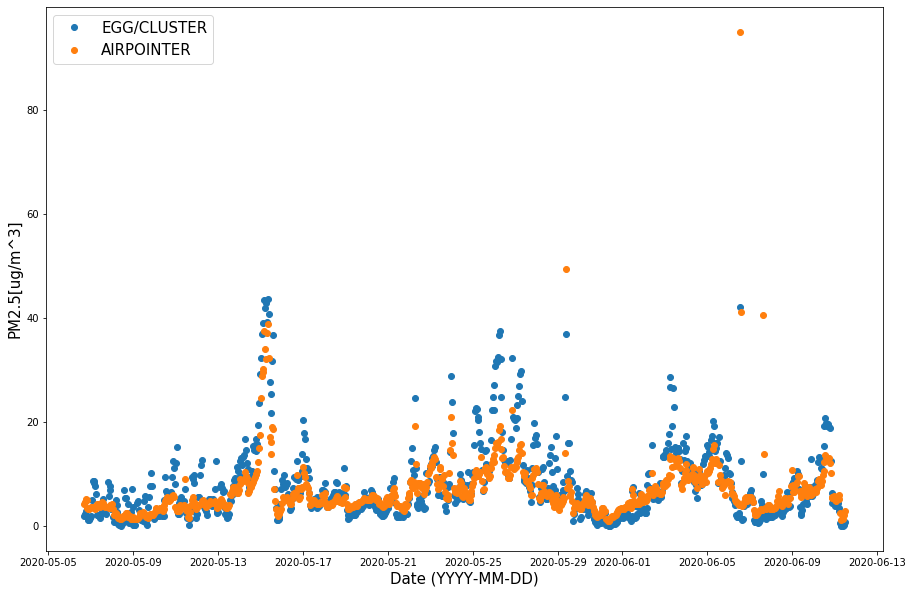

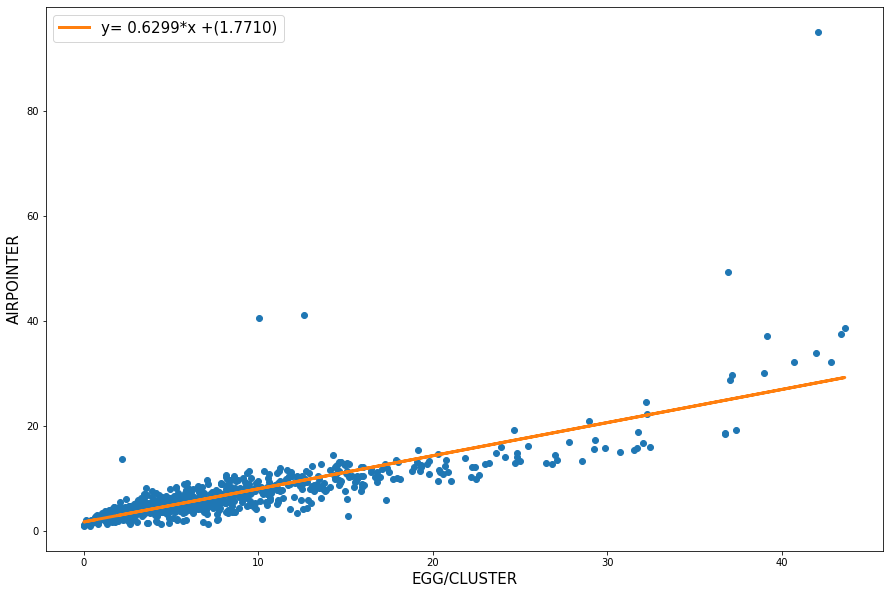

In [7]:
# ----------------------------- PM2.5 FROM CLUSTER vs. PM2.5 FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['PM2.5[ug/m^3]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['PM2.5_conc'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('PM2.5[ug/m^3]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['PM2.5[ug/m^3]'].to_numpy()
# Airpointer
yValues = dataframe['PM2.5_conc'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.3972602833619515

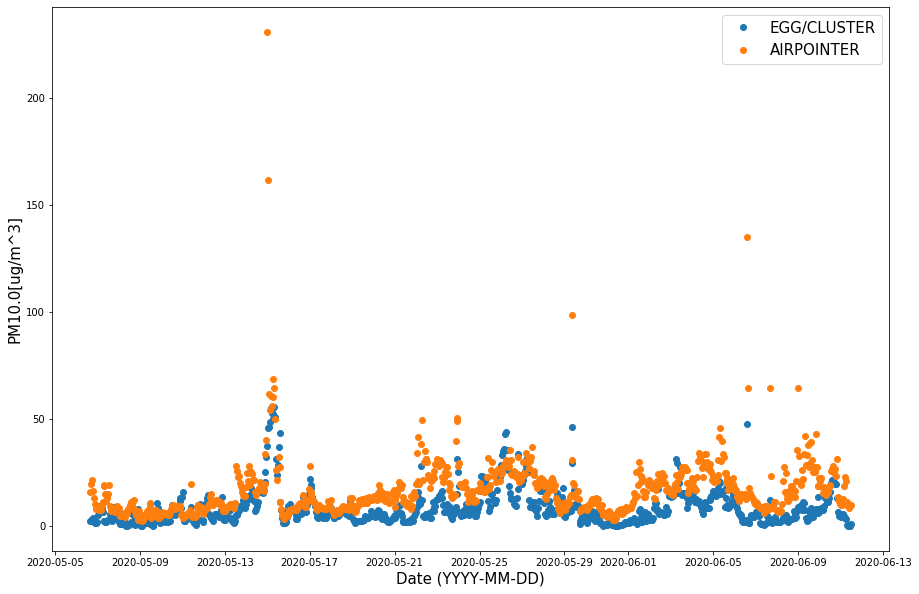

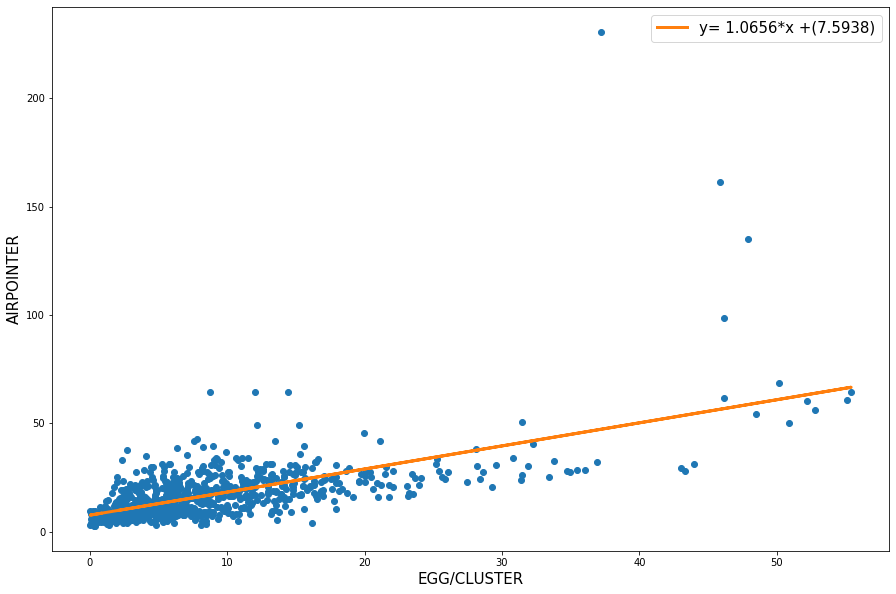

In [3]:
# ----------------------------- PM10.0 FROM CLUSTER vs. PM10.0 FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['PM10.0[ug/m^3]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['PM10_conc'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('PM10.0[ug/m^3]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['PM10.0[ug/m^3]'].to_numpy()
# Airpointer
yValues = dataframe['PM10_conc'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.5081524967870208

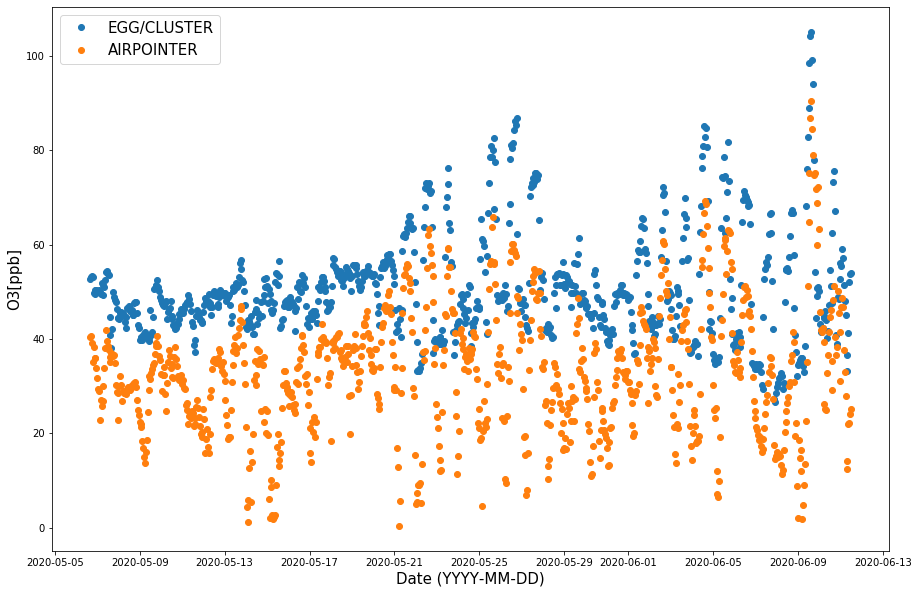

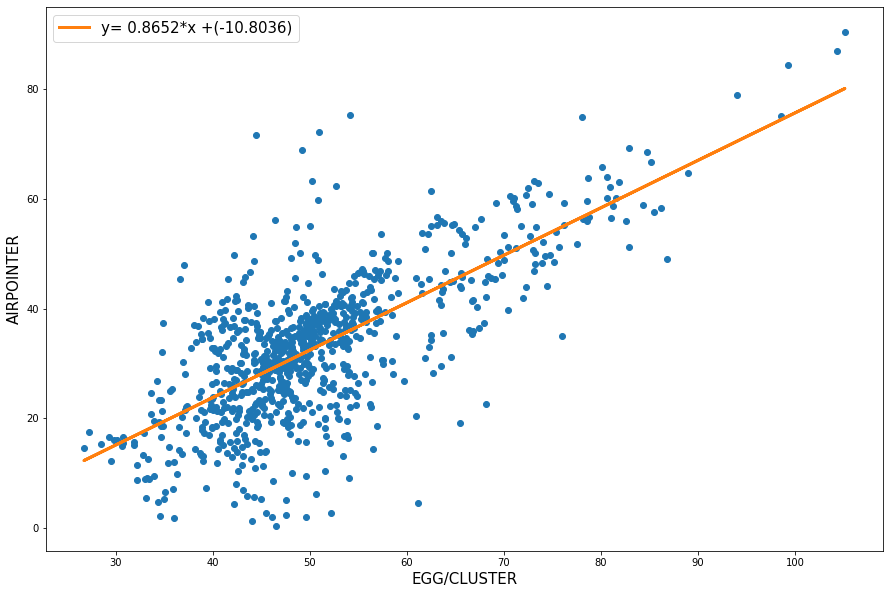

In [5]:
# ----------------------------- O3 (OZONE) FROM CLUSTER vs. O3 (OZONE) FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['O3[ppb]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['O3'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('O3[ppb]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['O3[ppb]'].to_numpy()
# Airpointer
yValues = dataframe['O3'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

0.027125760480230632

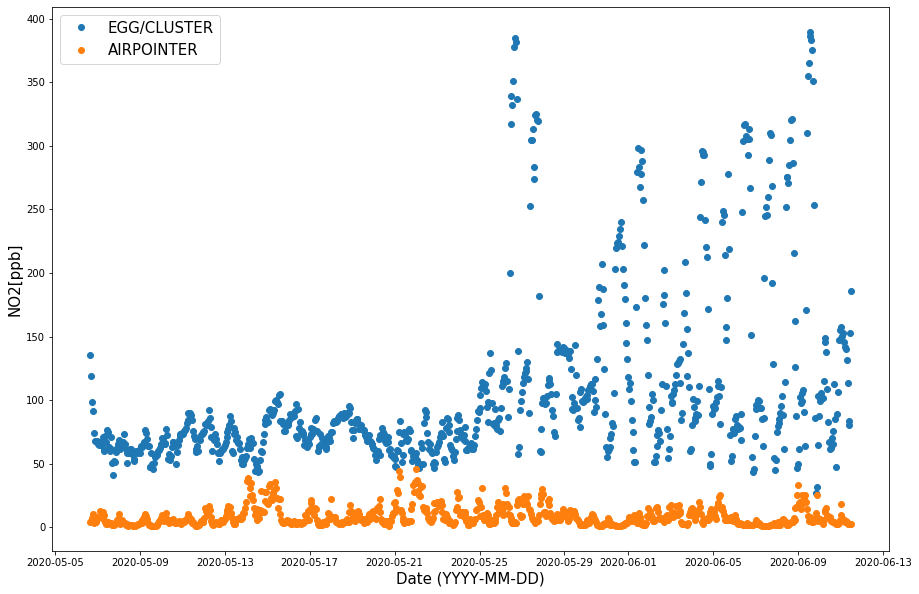

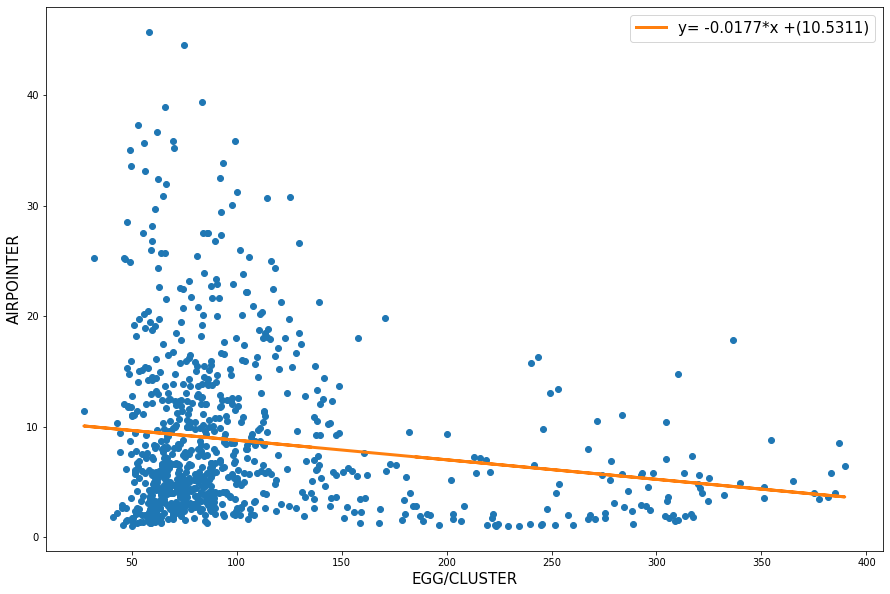

In [11]:
# ----------------------------- NO2 FROM CLUSTER vs. NO2 FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['NO2[ppb]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['NO2'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2[ppb]', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['NO2[ppb]'].to_numpy()
# Airpointer
yValues = dataframe['NO2'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

In [19]:
#  ALL EGG PARAMETERS WITH NO2[ppb] and O3[ppb]
# Drop select features
features_to_drop = ['NO', 'NOx','PM10_conc', 'PM10-2.5_conc','PM2.5_conc', 'O3', 'Air_Temperature', 'Relative_Humidity']
# ------------------------------------- BUILD TRAINING AND TEST SETS -------------------------------------
# Split the dataset into TRAINING and TESTING sets
# TRAINING SET
train_dataset = drop_values(dataframe, dataframe.index, '2020-06-02 15:00:00', 0)
train_dataset = train_dataset.drop(columns=features_to_drop)
# TESTING SET
test_dataset = drop_values(dataframe, dataframe.index, '2020-06-02 16:00:00', 1)
test_dataset = test_dataset.drop(columns=features_to_drop)
train_stats = train_dataset.describe()
train_stats.pop("NO2")
train_stats = train_stats.transpose()
# Seperate the target values
# TRAINING SET
train_labels = train_dataset.pop('NO2')
# TESTING SET
test_labels = test_dataset.pop('NO2')
train_dataset

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa]
Timestamp,,,,,,,,,,
2020-05-06 16:00:00,21.898333,19.096778,1.161667,1.975000,2.187778,52.662000,1.424325,135.239611,1.422013,99140.480000
2020-05-06 17:00:00,21.836278,18.678667,1.469444,2.380556,2.604444,53.213833,1.424310,118.911944,1.422118,99111.335556
2020-05-06 18:00:00,18.713167,20.979889,1.914444,2.970556,3.246667,53.447722,1.424056,98.456389,1.422115,99124.504444
2020-05-06 19:00:00,15.544500,24.716389,2.207222,3.381667,3.666111,53.151778,1.423809,91.426611,1.422016,99156.430556
2020-05-06 20:00:00,14.085389,23.612889,1.320000,1.861111,1.991111,49.789500,1.423761,74.300333,1.422064,99214.601111
...,...,...,...,...,...,...,...,...,...,...
2020-06-02 11:00:00,22.666278,46.194778,3.690556,5.188333,5.552778,43.138611,1.424584,74.345278,1.422459,99197.744444
2020-06-02 12:00:00,27.544556,38.228333,4.591667,6.193333,6.565556,44.302833,1.425014,67.625333,1.422764,99082.551111
2020-06-02 13:00:00,28.596307,35.710928,4.516508,6.133356,6.513857,57.359519,1.424852,91.934758,1.422649,98951.915158


In [21]:
# --------------------------------- NORM THE DATASET -------------------------------
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
# --------------------------- TRAIN THE ELASTICNET MODEL ---------------------------
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(normed_train_data, train_labels)
print("TRAINING PERFORMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_train_data, train_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(train_labels, elastic_net.predict(normed_train_data))))
print("TEST PERFROMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_test_data, test_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(test_labels, elastic_net.predict(normed_test_data))))
# for i in range(len(DATA_train_dataframe.columns)):
#     print("{}: {}".format(DATA_train_dataframe.columns[i], elastic_net.coef_[i]))
print("\nIntercept:", elastic_net.intercept_)

TRAINING PERFORMANCE:
Training set score: 0.439577
MAE: 4.1524

TEST PERFROMANCE:
Training set score: 0.037498
MAE: 4.3749


Intercept: 9.036683641979236


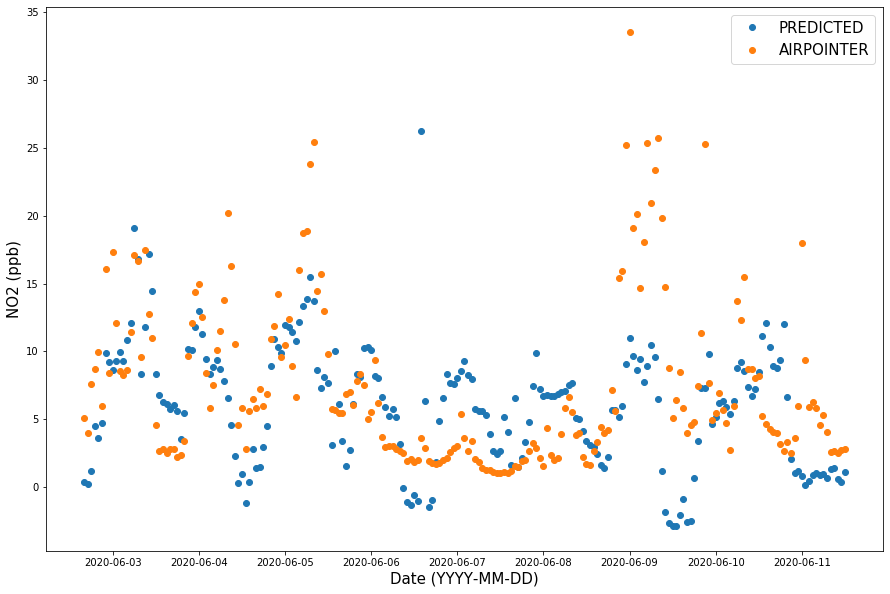

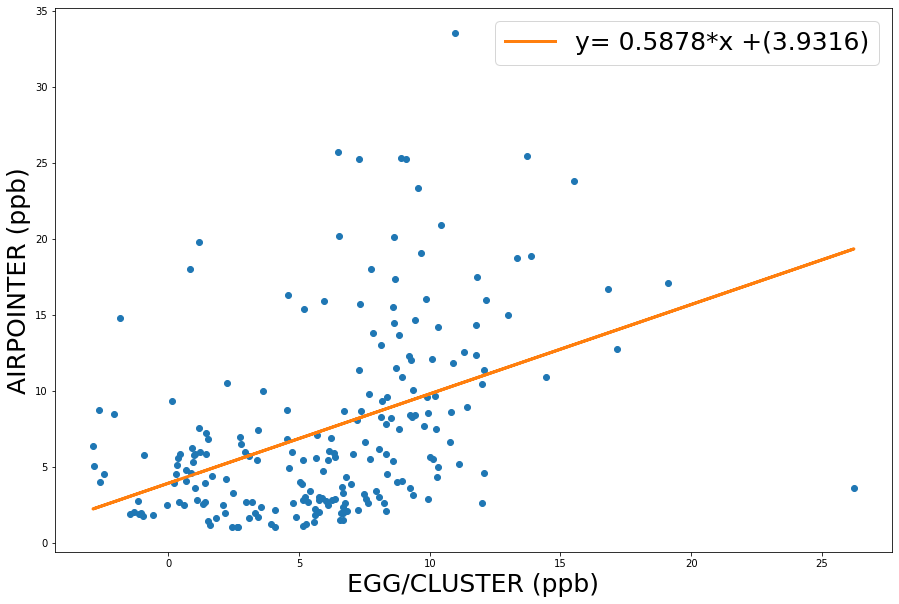

In [24]:
plt.figure(figsize=(15,10))
plt.plot(test_labels.index.to_series(), elastic_net.predict(normed_test_data), 'o', label="PREDICTED")
plt.plot(test_labels.index.to_series(), test_labels, 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = elastic_net.predict(normed_test_data)
yValues = test_labels
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER (ppb)', fontsize=25)
plt.ylabel('AIRPOINTER (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

In [25]:
# Calculate the R2 score
print("\nR2:", metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1))))# Plot the time series graph


R2: 0.18309157120264308


In [ ]:
#  ALL EGG PARAMETERS WITHOUT NO2[ppb] and O3 [ppb]
# ------------------------------------- BUILD TRAINING AND TEST SETS -------------------------------------
# Split the dataset into TRAINING and TESTING sets
train_dataset = drop_values(dataframe, dataframe.index, '2020-06-02 15:00:00', 0)
train_dataset = train_dataset.drop(columns=['NO', 'NOx', 'NO2[ppb]', 'O3[ppb]', 
                                            'PM10_conc', 'PM10-2.5_conc','PM2.5_conc', 'O3', 
                                            'Air_Temperature', 'Relative_Humidity'])
test_dataset = drop_values(dataframe, dataframe.index, '2020-06-02 16:00:00', 1)
test_dataset = test_dataset.drop(columns=['NO', 'NOx', 'NO2[ppb]', 'O3[ppb]',
                                          'PM10_conc', 'PM10-2.5_conc','PM2.5_conc','O3', 
                                          'Air_Temperature', 'Relative_Humidity'])
train_stats = train_dataset.describe()
train_stats.pop("NO2")
train_stats = train_stats.transpose()
# Seperate the target values
# TRAINING SET
train_labels = train_dataset.pop('NO2')
# TESTING SET
test_labels = test_dataset.pop('NO2')

train_dataset.head()

In [ ]:
# --------------------------------- NORM THE DATASET -------------------------------
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
# --------------------------- TRAIN THE ELASTICNET MODEL ---------------------------
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(normed_train_data, train_labels)
print("TRAINING PERFORMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_train_data, train_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(train_labels, elastic_net.predict(normed_train_data))))
print("TEST PERFROMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_test_data, test_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(test_labels, elastic_net.predict(normed_test_data))))
# for i in range(len(DATA_train_dataframe.columns)):
#     print("{}: {}".format(DATA_train_dataframe.columns[i], elastic_net.coef_[i]))
print("\nIntercept:", elastic_net.intercept_)

# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(test_labels.index.to_series(), elastic_net.predict(normed_test_data), 'o', label="PREDICTED")
plt.plot(test_labels.index.to_series(), test_labels, 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = elastic_net.predict(normed_test_data)
yValues = test_labels
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER (ppb)', fontsize=25)
plt.ylabel('AIRPOINTER (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
print("\nR2:", metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1))))

In [ ]:
#  TEMP HUMIDITY O3[V] NO2[V] PRESSURE[PA]
# ------------------------------------- BUILD TRAINING AND TEST SETS -------------------------------------
# Split the dataset into TRAINING and TESTING sets
train_dataset = drop_values(dataframe, dataframe.index, '2020-06-02 15:00:00', 0)
train_dataset = train_dataset.drop(columns=['NO', 'NOx', 'NO2[ppb]', 'O3[ppb]',
                                            'PM1.0[ug/m^3]', 'PM2.5[ug/m^3]', 'PM10.0[ug/m^3]',
                                            'PM10_conc', 'PM10-2.5_conc','PM2.5_conc', 'O3', 
                                            'Air_Temperature', 'Relative_Humidity'])
test_dataset = drop_values(dataframe, dataframe.index, '2020-06-02 16:00:00', 1)
test_dataset = test_dataset.drop(columns=['NO', 'NOx','NO2[ppb]', 'O3[ppb]',
                                          'PM1.0[ug/m^3]', 'PM2.5[ug/m^3]', 'PM10.0[ug/m^3]', 
                                          'PM10_conc', 'PM10-2.5_conc','PM2.5_conc','O3', 
                                          'Air_Temperature', 'Relative_Humidity'])
train_stats = train_dataset.describe()
train_stats.pop("NO2")
train_stats = train_stats.transpose()
# Seperate the target values
# TRAINING SET
train_labels = train_dataset.pop('NO2')
# TESTING SET
test_labels = test_dataset.pop('NO2')

train_dataset.head()

In [ ]:
# --------------------------------- NORM THE DATASET -------------------------------
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
# --------------------------- TRAIN THE ELASTICNET MODEL ---------------------------
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(normed_train_data, train_labels)
print("TRAINING PERFORMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_train_data, train_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(train_labels, elastic_net.predict(normed_train_data))))
print("TEST PERFROMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_test_data, test_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(test_labels, elastic_net.predict(normed_test_data))))
# for i in range(len(DATA_train_dataframe.columns)):
#     print("{}: {}".format(DATA_train_dataframe.columns[i], elastic_net.coef_[i]))
print("\nIntercept:", elastic_net.intercept_)

# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(test_labels.index.to_series(), elastic_net.predict(normed_test_data), 'o', label="PREDICTED")
plt.plot(test_labels.index.to_series(), test_labels, 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = elastic_net.predict(normed_test_data)
yValues = test_labels
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER (ppb)', fontsize=25)
plt.ylabel('AIRPOINTER (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
print("\nR2:", metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1))))

In [ ]:
#  ALL EGG PARAMETERS and AIRPOINTER PARAMETERS
# ------------------------------------- BUILD TRAINING AND TEST SETS -------------------------------------
# Split the dataset into TRAINING and TESTING sets
train_dataset = drop_values(dataframe, dataframe.index, '2020-06-02 15:00:00', 0)
train_dataset = train_dataset.drop(columns=['NO', 'NOx'])
test_dataset = drop_values(dataframe, dataframe.index, '2020-06-02 16:00:00', 1)
test_dataset = test_dataset.drop(columns=['NO', 'NOx'])
train_stats = train_dataset.describe()
train_stats.pop("NO2")
train_stats = train_stats.transpose()
# Seperate the target values
# TRAINING SET
train_labels = train_dataset.pop('NO2')
# TESTING SET
test_labels = test_dataset.pop('NO2')

train_dataset.head()

In [ ]:
# --------------------------------- NORM THE DATASET -------------------------------
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
# --------------------------- TRAIN THE ELASTICNET MODEL ---------------------------
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(normed_train_data, train_labels)
print("TRAINING PERFORMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_train_data, train_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(train_labels, elastic_net.predict(normed_train_data))))
print("TEST PERFROMANCE:")
print("Training set score: {:0.6f}".format(elastic_net.score(normed_test_data, test_labels)))
print('MAE: {:0.4f}\n'.format(metrics.mean_absolute_error(test_labels, elastic_net.predict(normed_test_data))))
# for i in range(len(DATA_train_dataframe.columns)):
#     print("{}: {}".format(DATA_train_dataframe.columns[i], elastic_net.coef_[i]))
print("\nIntercept:", elastic_net.intercept_)

# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(test_labels.index.to_series(), elastic_net.predict(normed_test_data), 'o', label="PREDICTED")
plt.plot(test_labels.index.to_series(), test_labels, 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = elastic_net.predict(normed_test_data)
yValues = test_labels
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER (ppb)', fontsize=25)
plt.ylabel('AIRPOINTER (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
print("\nR2:", metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1))))